## Affordable Housing Projects and Environmental Risk in Los Angeles

Where are affordable housing projects being built in Los Angeles? 

What neighborhoods or areas are at higher risk for environmental harm, particularly by multiple sources of pollution? 

Are affordable housing projects being developed in areas that are at higher levels of environmental vulnerability?

What types of affordable housing projects are there?

**Affordable Housing Projects List:** This data includes affordable housing projects financed by HCIDLA through several local and state programs from 2003-present. This project list contains participants, property, units, construction and milestone information.

**CalEnviroScreen:** This data identifies California communities by census tract that are disproportionately burdened by, and vulnerable to, multiple sources of pollution. 


In [58]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px


afford0 = gpd.read_file('HCIDLA Affordable Housing Projects(2003-Present).geojson')
enviro0 = pd.read_excel ('CAenviroScore.xlsx')

We need to subset our dataframe to consist of relevant variables

In [59]:
ecol = ['Census Tract',
 'Total Population',
 'California County',
 'ZIP',
 'Nearby City \n(to help approximate location only)',
 'Longitude',
 'Latitude',
 'CES 3.0 Score',
 ' CES 3.0 Percentile',
 'CES 3.0 \nPercentile Range',
 'SB 535 Disadvantaged Community']

In [60]:
enviro = enviro0[ecol]

In [61]:
enviro.shape

(8035, 11)

In [62]:
enviro0.shape

(8035, 57)

The data frame is from all over California, so we want only LA county

In [167]:
enla = enviro.loc[enviro['California County'] == 'Los Angeles']

In [168]:
enla.shape

(2343, 11)

This is too make sure we get valid CES scores to work with!

In [65]:
enla = enla.loc[enviro['CES 3.0 Score'] > 0]

In [66]:
enla.shape

(2298, 11)

Some prelimary stats

In [67]:
enla['CES 3.0 Score'].mean()

36.493198440421985

A look at what we are working with

In [68]:
enla.head()

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,SB 535 Disadvantaged Community
5,6037204920,2598,Los Angeles,90023,Los Angeles,-118.197497,34.017500,80.726872,99.936940,95-100% (highest scores),Yes
8,6037206050,2146,Los Angeles,90023,Los Angeles,-118.224453,34.029904,79.025293,99.899105,95-100% (highest scores),Yes
14,6037205120,3618,Los Angeles,90023,Los Angeles,-118.211796,34.018755,78.043685,99.823433,95-100% (highest scores),Yes
16,6037291220,3353,Los Angeles,90247,Gardena,-118.286709,33.877139,77.497763,99.798209,95-100% (highest scores),Yes
20,6037239202,4724,Los Angeles,90001,Los Angeles,-118.264977,33.985678,76.043426,99.747761,95-100% (highest scores),Yes


A quick look at CES score distribution in our data

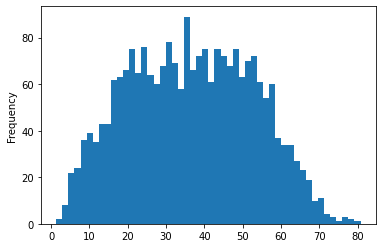

In [69]:
enla['CES 3.0 Score'].plot.hist(bins =50)

A much better visual of the CES score distribution

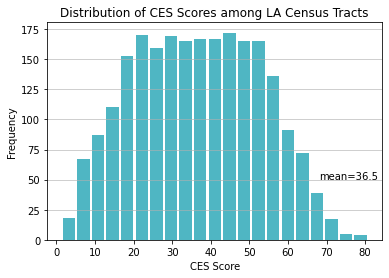

In [70]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=enla['CES 3.0 Score'], bins='auto', color='#0597aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('CES Score')
plt.ylabel('Frequency')
plt.title('Distribution of CES Scores among LA Census Tracts')
plt.text(68, 50, r'mean=36.5')
maxfreq = n.max()

##### This shows how there is great variation in LA county in regards to environmental risks by location

Subsetting variables for the affordable housing dataset

In [71]:
acol = ['site_units',
 'community',
 'name',
 'leverage',
 'latitude',
 'project_number',
 'hcidla_funded',
 'gps_coords',
 'longitude',
 'date_funded',
 'construction_type',
 'in_service_date',
 'address',
 'project_total_units',
 'housing_type']

In [72]:
afford = afford0[acol]

In [73]:
afford.shape

(503, 15)

In [74]:
afford0.shape

(503, 35)

reduced from 35 to 15 variables

In [75]:
afford.head()

,site_units,community,name,leverage,latitude,project_number,hcidla_funded,gps_coords,longitude,date_funded,construction_type,in_service_date,address,project_total_units,housing_type
0,0,CENTRAL,LEXINGTON APARTMENTS A/B (SITE 11),6771719,34.02133,05-117217,0,"(34.02133,-118.25561)",-118.25561,2005-12-28T00:00:00,REHAB,2006,"1145 E 24TH ST Los Angeles, CA 90011",251,FAMILY
1,8,CENTURY PALMS/COVE,WINDWARD APTS (A/B) (SITE 14),7438473,33.93817,06-117222,0,"(33.93817,-118.26374)",-118.26374,2006-04-01T00:00:00,REHAB,2007,"636 E 108TH ST 1-4 Los Angeles, CA 90059",232,FAMILY
2,16,HOLLYWOOD,BRICKER,6465419,34.10127,60057,627878,"(34.10127,-118.30957)",-118.30957,2007-02-24T00:00:00,ACQUISITION + REHAB,2011,"1671 N WESTERN AVE Los Angeles, CA 90028",16,SENIORS
3,20,UNIVERSITY PARK,HDR I & II (SITE 4),8116043,34.03158,07-117233,0,"(34.03158,-118.28106)",-118.28106,2007-07-01T00:00:00,REHAB,2008,"2375 S SCARFF ST Los Angeles, CA 90007",125,FAMILY
4,16,KOREATOWN,ALEXANDRIA HOUSE APTS.,5928306,34.06506,80050,800000,"(34.06506,-118.29775)",-118.29775,2008-11-21T00:00:00,REHAB,2010,"510 S ALEXANDRIA AVE 1-20 Los Angeles, CA 90020",16,SPECIAL NEEDS


 Lets see how many communities are scored as disadvantaged 

In [87]:
px.bar(enla,
       x='SB 535 Disadvantaged Community', color = 'SB 535 Disadvantaged Community',
       title='Comparing the Types of Tracts in LA County'
      )

How do the disadvantaged communited rank in percentile of high CES scores. It's evident that disadvantaged communties all consistently have high CES scores compared to other communities. 

In [90]:
px.bar(enla, x='CES 3.0 \nPercentile Range', color = 'SB 535 Disadvantaged Community',
       labels={'CES 3.0 \nPercentile Range':'CES Percentile Range','count':'count'}
      )

In [93]:
afford.shape

(503, 15)

In [94]:
afford.head()

,site_units,community,name,leverage,latitude,project_number,hcidla_funded,gps_coords,longitude,date_funded,construction_type,in_service_date,address,project_total_units,housing_type
0,0,CENTRAL,LEXINGTON APARTMENTS A/B (SITE 11),6771719,34.02133,05-117217,0,"(34.02133,-118.25561)",-118.25561,2005-12-28T00:00:00,REHAB,2006,"1145 E 24TH ST Los Angeles, CA 90011",251,FAMILY
1,8,CENTURY PALMS/COVE,WINDWARD APTS (A/B) (SITE 14),7438473,33.93817,06-117222,0,"(33.93817,-118.26374)",-118.26374,2006-04-01T00:00:00,REHAB,2007,"636 E 108TH ST 1-4 Los Angeles, CA 90059",232,FAMILY
2,16,HOLLYWOOD,BRICKER,6465419,34.10127,60057,627878,"(34.10127,-118.30957)",-118.30957,2007-02-24T00:00:00,ACQUISITION + REHAB,2011,"1671 N WESTERN AVE Los Angeles, CA 90028",16,SENIORS
3,20,UNIVERSITY PARK,HDR I & II (SITE 4),8116043,34.03158,07-117233,0,"(34.03158,-118.28106)",-118.28106,2007-07-01T00:00:00,REHAB,2008,"2375 S SCARFF ST Los Angeles, CA 90007",125,FAMILY
4,16,KOREATOWN,ALEXANDRIA HOUSE APTS.,5928306,34.06506,80050,800000,"(34.06506,-118.29775)",-118.29775,2008-11-21T00:00:00,REHAB,2010,"510 S ALEXANDRIA AVE 1-20 Los Angeles, CA 90020",16,SPECIAL NEEDS


The affordable housing data allows us to see the coordinate locations of the projects

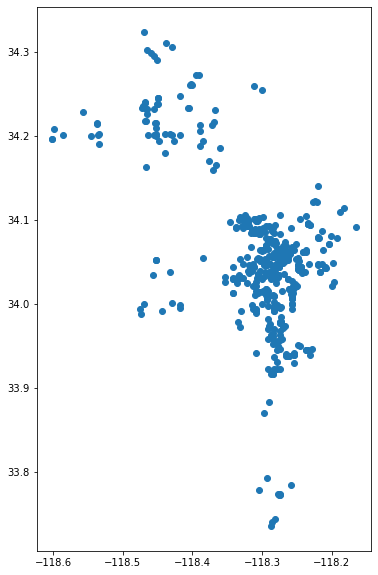

In [97]:
afford0.plot(figsize = (10,10))

In [99]:
afford0.head()

,site_units,tax_exempt_conduit_bond,community,contract_url,development_stage,name,location,leverage,latitude,photo,...,contract_numbers,address,apn,project_total_units,housing_type,management_company,supportive_housing,council_district,tdc,geometry
0,0,10247566,CENTRAL,None,In-Service,LEXINGTON APARTMENTS A/B (SITE 11),0xE6100000010C3B3602F1BA024140F5A10BEA5B905DC0,6771719,34.02133,click here (http://hcidapp.lacity.org/mpphotos...,...,None,"1145 E 24TH ST Los Angeles, CA 90011",5131020009,251,FAMILY,"ALPHA PROPERTY MANAGEMENT, INC.",No,9,17019285,POINT (-118.25561 34.02133)
1,8,4641342,CENTURY PALMS/COVE,None,In-Service,WINDWARD APTS (A/B) (SITE 14),0xE6100000010C4E0B5EF415F8404069A9BC1DE1905DC0,7438473,33.93817,click here (http://hcidapp.lacity.org/mpphotos...,...,None,"636 E 108TH ST 1-4 Los Angeles, CA 90059",6071001013,232,FAMILY,"ALPHA PROPERTY MANAGEMENT, INC.",No,8,12079815,POINT (-118.26374 33.93817)
2,16,0,HOLLYWOOD,https://hcidapp.lacity.org/citycontractref/def...,In-Service,BRICKER,0xE6100000010C7008556AF60C4140A774B0FECF935DC0,6465419,34.10127,click here (http://hcidapp.lacity.org/mpphotos...,...,C-111304 (https://hcidapp.lacity.org/citycontr...,"1671 N WESTERN AVE Los Angeles, CA 90028",5544025033,16,SENIORS,BARKER MANAGEMENT INCORPORATED,No,13,7093297,POINT (-118.30957 34.10127)
3,20,6787000,UNIVERSITY PARK,None,In-Service,HDR I & II (SITE 4),0xE6100000010C959A3DD00A044140AE0D15E3FC915DC0,8116043,34.03158,click here (http://hcidapp.lacity.org/mpphotos...,...,None,"2375 S SCARFF ST Los Angeles, CA 90007",5124011008,125,FAMILY,PK MANAGEMENT,No,1,14903043,POINT (-118.28106 34.03158)
4,16,0,KOREATOWN,https://hcidapp.lacity.org/citycontractref/def...,In-Service,ALEXANDRIA HOUSE APTS.,0xE6100000010C8E23D6E253084140931804560E935DC0,5928306,34.06506,click here (http://hcidapp.lacity.org/mpphotos...,...,C-114811 (https://hcidapp.lacity.org/citycontr...,"510 S ALEXANDRIA AVE 1-20 Los Angeles, CA 90020",5502020005,16,SPECIAL NEEDS,BARKER MANAGEMENT INC.,Yes,10,6728306,POINT (-118.29775 34.06506)


Here we can view the projects by their council district

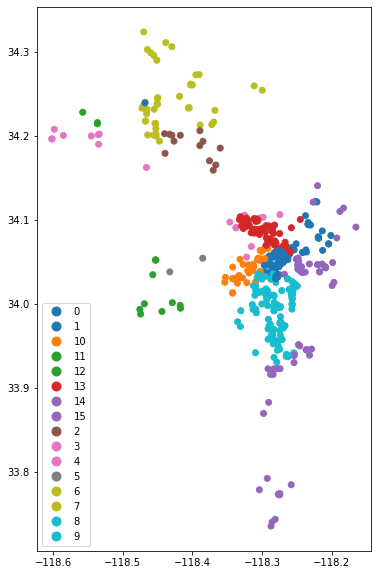

In [120]:
afford0.plot(figsize = (10,10), column = 'council_district', legend = True)

In [115]:
afford_sorted = afford0.sort_values(by='project_total_units',ascending = False)
afford_sorted.head(10)


,site_units,tax_exempt_conduit_bond,community,contract_url,development_stage,name,location,leverage,latitude,photo,...,contract_numbers,address,apn,project_total_units,housing_type,management_company,supportive_housing,council_district,tdc,geometry
153,99,4970000,WHOLESALE DISTRICT,https://hcidapp.lacity.org/citycontractref/def...,In-Service,FLOR 401 LOFTS,0xE6100000010CE8F692C6680541404030478FDF8F5DC0,37707018,34.04226,click here (http://hcidapp.lacity.org/mpphotos...,...,"C-132475,C-132476 (https://hcidapp.lacity.org/...","401 E 7TH ST Los Angeles, CA 90014",5148024026,99,SPECIAL NEEDS,SRHT PROPERTY MANAGEMENT COMPANY,Yes,14,55658910,POINT (-118.24802 34.04226)
451,0,0,PANORAMA CITY,https://hcidapp.lacity.org/citycontractref/def...,In-Service,MONTECITO TERRACES (SITE 2),0xE6100000010C2BD9B111881B4140FB7953910A9D5DC0,21684852,34.21509,click here (http://hcidapp.lacity.org/mpphotos...,...,"C-116756,C-116757 (https://hcidapp.lacity.org/...","14726 W BLYTHE ST Panorama City, CA 91402",2210021029,98,SENIORS,THE JOHN STEWART COMPANY,Yes,6,24720434,POINT (-118.45377 34.21509)
334,98,0,RESEDA,https://hcidapp.lacity.org/citycontractref/def...,In-Service,CANBY WOODS SENIOR HOUSING,0xE6100000010CA089B0E1E9194140878A71FE26A25DC0,22425602,34.20245,click here (http://hcidapp.lacity.org/mpphotos...,...,C-118988 (https://hcidapp.lacity.org/citycontr...,"7238 N CANBY AVE 1-98 Reseda, CA 91335",2119021045,98,SENIORS,THOMAS SAFRAN & ASSOCIATES,No,3,24772605,POINT (-118.53363 34.20245)
57,98,0,MELROSE,https://hcidapp.lacity.org/citycontractref/def...,Development,MCCADDEN CAMPUS SENIOR (AKA MCCADDEN PLAZA SEN...,0xE6100000010C48C49448A20B4140E449D23593955DC0,0,34.09089,click here (http://hcidapp.lacity.org/mpphotos...,...,"C-130714,C-132577 (https://hcidapp.lacity.org/...","1127 N Las Palmas AVE Los Angeles, CA 90038",5532021032,98,SENIORS,N/A,Yes,4,10430159,POINT (-118.33711 34.09089)
325,98,0,PANORAMA CITY,https://hcidapp.lacity.org/citycontractref/def...,In-Service,MONTECITO TERRACES,0xE6100000010C5D16139B8F1B41409E245D33F99C5DC0,21684852,34.21532,click here (http://hcidapp.lacity.org/mpphotos...,...,"C-116756,C-116757 (https://hcidapp.lacity.org/...","14653 W BLYTHE ST VAN NUYS, CA 91402",2210020003,98,SENIORS,THE JOHN STEWART COMPANY,Yes,6,24720434,POINT (-118.45271 34.21532)
83,97,0,BOYLE HEIGHTS,https://hcidapp.lacity.org/citycontractref/def...,In-Service,LINDA VISTA APARTMENTS (PHASE II),0xE6100000010C7E52EDD3F104414052B81E85EB8D5DC0,20513952,34.03863,click here (http://hcidapp.lacity.org/mpphotos...,...,C-122710 (https://hcidapp.lacity.org/citycontr...,"610 S ST LOUIS ST Los Angeles, CA 90023",5183023003,97,SENIORS,"FPI MANAGEMENT, INC",Yes,14,34149627,POINT (-118.21750 34.03863)
285,97,10924067,VAN NUYS,None,In-Service,WEST VALLEY TOWERS,0xE6100000010C68791EDC9D1941403ECBF3E0EE9C5DC0,12527434,34.20013,click here (http://hcidapp.lacity.org/mpphotos...,...,None,"14650 W SHERMAN WAY VAN NUYS, CA 91405",2219007027,97,SENIORS,"RETIREMENT HOUSING FOUNDATION,",No,6,23451501,POINT (-118.45208 34.20013)
441,97,0,DOWNTOWN,https://hcidapp.lacity.org/citycontractref/def...,In-Service,NEW CARVER,0xE6100000010CA3409FC893044140176536C824915DC0,27345678,34.03576,click here (http://hcidapp.lacity.org/mpphotos...,...,C-113126 (https://hcidapp.lacity.org/citycontr...,"1624 S HOPE ST 1-97 Los Angeles, CA 90015",5134014019,97,SPECIAL NEEDS,"NEW CARVER APARTMENTS, LP",Yes,14,33945678,POINT (-118.26787 34.03576)
473,97,5600000,WESTLAKE,https://hcidapp.lacity.org/citycontractref/def...,In-Service,ASBURY,0xE6100000010C390B7BDAE1074140EE3D5C72DC915DC0,3307020,34.06158,click here (http://hcidapp.lacity.org/mpphotos...,...,C-105204 (https://hcidapp.lacity.org/citycontr...,"2501 W 6TH ST Los Angeles, CA 90057",5155029010,97,N/A,WINSTAR PROPERTIES INC.,No,1,12925020,POINT (-118.27908 34.06158)
342,0,0,WEST VERNON,https://hcidapp.lacity.org/citycontractref/def...,In-Service,TWO WORLD APARTMENTS (SITE 4),0xE6100000010CD5E76A2BF6FF4040357BA01518945DC0,17094146,33.9997

Next we coerce our data types to gps compatible to gain further insights

In [121]:
afford0.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   site_units                 503 non-null    object  
 1   tax_exempt_conduit_bond    503 non-null    object  
 2   community                  502 non-null    object  
 3   contract_url               346 non-null    object  
 4   development_stage          503 non-null    object  
 5   name                       503 non-null    object  
 6   location                   503 non-null    object  
 7   leverage                   503 non-null    object  
 8   latitude                   503 non-null    object  
 9   photo                      503 non-null    object  
 10  contract_number_hyperlink  346 non-null    object  
 11  project_number             503 non-null    object  
 12  developer                  503 non-null    object  
 13  date_stamp                 

In [122]:
aacol = ['site_units',
 'community',
 'name',
 'leverage',
 'latitude',
 'project_number',
 'hcidla_funded',
 'gps_coords',
 'longitude',
 'date_funded',
 'construction_type',
 'in_service_date',
 'address',
 'project_total_units',
 'housing_type',
 'geometry']

In [124]:
aff = afford0[aacol]

In [125]:
aff['latitude'] = aff['latitude'].astype(float)
aff['longitude'] = aff['longitude'].astype(float)
aff.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   site_units           503 non-null    object  
 1   community            502 non-null    object  
 2   name                 503 non-null    object  
 3   leverage             503 non-null    object  
 4   latitude             503 non-null    float64 
 5   project_number       503 non-null    object  
 6   hcidla_funded        503 non-null    object  
 7   gps_coords           503 non-null    object  
 8   longitude            503 non-null    float64 
 9   date_funded          503 non-null    object  
 10  construction_type    503 non-null    object  
 11  in_service_date      503 non-null    object  
 12  address              503 non-null    object  
 13  project_total_units  503 non-null    object  
 14  housing_type         503 non-null    object  
 15  geometry       

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The data is now compatiable with plotly.express

In [127]:
px.scatter(aff, x = 'longitude', y = 'latitude')

We get an excellent visual that overlays the projects onto a map of Los Angeles.

In [136]:
fig = px.scatter_mapbox(aff, lon = 'longitude', 
                        lat = 'latitude', 
                        mapbox_style = 'open-street-map',
                        )
fig.show()

We segment the affordable housing projects into what type of housing they are. We ask, does the type of housing vary the location and poximity to environmental risk or is this a nonfactor?

In [154]:
fig2 = px.scatter_mapbox(aff, 
                        lat="latitude", 
                        lon="longitude",
                        color="housing_type",
                        labels={'housing_type':'type'}
                       )

fig2.update_layout(mapbox_style="stamen-terrain")

fig2.show()

In [155]:
from ipywidgets import interact

In [158]:
type_list = aff.housing_type.unique().tolist()
type_list

['FAMILY',
 'SENIORS',
 'SPECIAL NEEDS',
 'N/A',
 'SRO',
 'LARGE FAMILY / WAIVER REQUIRED',
 'AT-RISK']

We add interactive drop-down menu to give clearer and alternative view into the affordable housing projects distribution around LA county in regards to housing type. 

In [166]:
@interact
def type_map(housing=type_list):
    
    fig = px.scatter_mapbox(aff[aff.housing_type==housing], 
                            lat="latitude", 
                            lon="longitude", 
                            color="housing_type",
                            labels={'housing_type':'type'}
                           )

    fig.update_layout(mapbox_style='open-street-map')

    fig.show()

interactive(children=(Dropdown(description='housing', options=('FAMILY', 'SENIORS', 'SPECIAL NEEDS', 'N/A', 'S…

Richard Garcia and Haley Karchmer

Richard - Mapping, data wrangling

Haley - Data sources, data wrangling
